## Sample Problem 1 (Ex 1 from Dynopt Guide)


\begin{align}
\sf minimize&: \, \sf x_2 \left(t_f\right) \\
\sf subject \, to &:\\
\sf \frac{dx_1}{dt} &= u \\
\sf \frac{dx_2}{dt} &= x_1^2 +u^2\\
\sf  x_1\left(0\right) &= 1 \\
\sf  x_2\left(0\right) &= 0 \\
\sf t_f &= 1
\end{align}



In [31]:
from pyomo.environ import *
from pyomo.dae import *

m = ConcreteModel()

m.t = ContinuousSet(bounds=(0,1)) 

m.x1 = Var(m.t, bounds=(0,1))
m.x2 = Var(m.t, bounds=(0,1))
m.u = Var(m.t, initialize=0)

m.x1dot = DerivativeVar(m.x1)
m.x2dot = DerivativeVar(m.x2)

m.obj = Objective(expr=m.x2[1])

def _x1dot(M,i):
    if i == 0:
        return Constraint.Skip
    return M.x1dot[i] == M.u[i]
m.x1dotcon = Constraint(m.t, rule=_x1dot)

def _x2dot(M,i):
    if i == 0:
        return Constraint.Skip
    return M.x2dot[i] == M.x1[i]**2 + M.u[i]**2
m.x2dotcon = Constraint(m.t, rule=_x2dot)

def _init(M):
    yield M.x1[0] == 1
    yield M.x2[0] == 0
    yield ConstraintList.End
m.init_conditions = ConstraintList(rule=_init)




******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Common Public License (CPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

NOTE: You are using Ipopt by default with the MUMPS linear solver.
      Other linear solvers might be more efficient (see Ipopt documentation).


This is Ipopt version 3.7.1, running with linear solver mumps.

Number of nonzeros in equality constraint Jacobian...:     2452
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      300

Total number of variables............................:      752
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      302
                

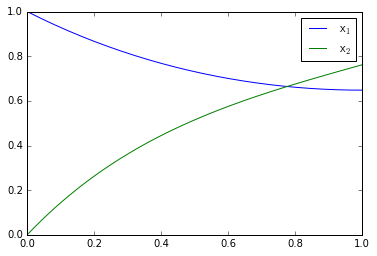

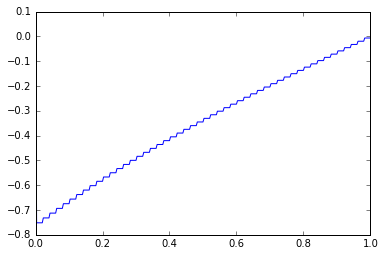

In [32]:
# Discretize model using Backward Finite Difference method
# discretizer = TransformationFactory('dae.finite_difference')
# discretizer.apply_to(m,nfe=20,scheme='BACKWARD')

# Discretize model using Orthogonal Collocation
discretizer = TransformationFactory('dae.collocation')
discretizer.apply_to(m,nfe=50,ncp=3,scheme='LAGRANGE-RADAU')
discretizer.reduce_collocation_points(m,var=m.u,ncp=1,contset=m.t)

solver=SolverFactory('ipopt')

results = solver.solve(m,tee=True)

x1 = []
x2 = []
u = []
t=[]

print(sorted(m.t))

for i in sorted(m.t):
    t.append(i)
    x1.append(value(m.x1[i]))
    x2.append(value(m.x2[i]))
    u.append(value(m.u[i]))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(t,x1, label='$\sf x_1$')
plt.plot(t,x2, label='$\sf x_2$')
plt.legend()
plt.show()

plt.plot(t,u)
plt.show()


/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


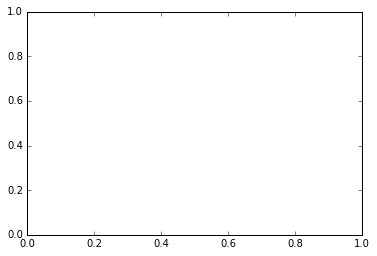

In [20]:
plt.legend()